<a href="https://colab.research.google.com/github/RadhikaRM/Bookrecommendersystem/blob/main/Book_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Problem Statement**

In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).

Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

**Content**

The Book-Crossing dataset comprises 3 files.

● Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

● Books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.

● Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

* Users Data

In [ ]:
#importing the required libraries
#Data wrangling
import numpy as np
import pandas as pd
#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
#To create wordcloud
from PIL import Image
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS
plt.rcParams["figure.figsize"] = (8,8)

In [ ]:
#loading the data to users_df
users_df=pd.read_csv("/content/drive/MyDrive/Almabetter/Project 4-Book Recommendation/Users.csv")

In [ ]:
#displaying the top 10 and bottom 10 rows of the dataframe
pd.concat([users_df.head(10),users_df.tail(10)],axis=0)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [ ]:
#inspecting the columns in users_df
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


* There are records of 278858 users in this dataframe.There are 3 columns in this dataframe.
* The 'Age' column has null values

In [ ]:
## Drop duplicate rows
users_df.drop_duplicates(keep='last', inplace=True) 
users_df.reset_index(drop = True, inplace = True)

In [ ]:
#summarizing data in 'Age' column
users_df['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

* The age 244 seems to be an outlier

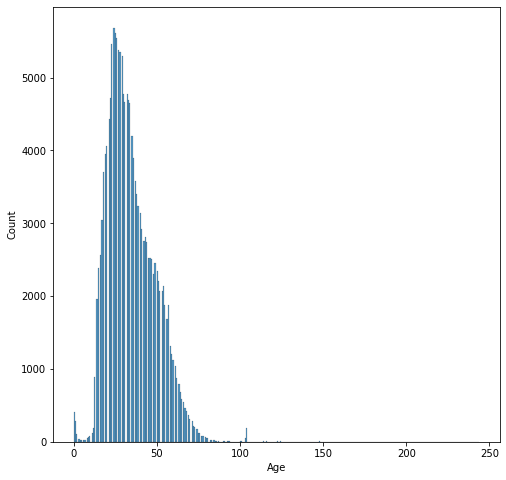

In [ ]:

sns.histplot(x='Age',data=users_df)

* Most of the users are from the age group 20-50
* It is highly unlikely to have users under the age of 5 and above 100

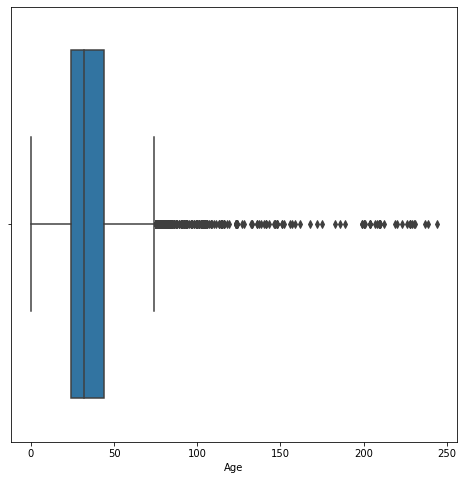

In [ ]:
sns.boxplot(x='Age',data=users_df)

* Most of the users have age below 100. 





It is highly unlikely to have users of age above 120.Let's replace these rows with median value of age

In [ ]:
ages_above_120=list(users_df[users_df['Age']>120]['Age'].unique())

In [ ]:
#replacing the outliers in 'Age' column with the median value
users_df['Age'].replace(to_replace=ages_above_120, value=users_df['Age'].median(),inplace=True)

In [ ]:
#percentage of missing values in 'Age' column
(users_df['Age'].isnull().sum()/len(users_df))*100

39.71985741847105

In [ ]:
#number of unique values in 'Location'
users_df['Location'].nunique()

57339

In [ ]:
import re
def remove_characters(sentence):
    ''' 
    Removes unwanted characters from the sentence such as '%','#','!','?' etc.
    '''
    sentence=sentence.lower()
    sentence = re.sub(r"[^a-zA-Z0-9 ,]","", sentence)
    return(sentence)

In [ ]:
#removing unwanted characters from the translated reviews
users_df['Location']=users_df['Location'].apply(lambda x:remove_characters(x))

In [ ]:
#splitting the 'Location' column to a list
users_df['l_split']=users_df['Location'].str.split(', ')

In [ ]:
#Extracting Country name from 'l_split'
users_df['Country']=users_df['l_split'].apply(lambda x: x[-1] if len(x)==3 else( x[-2] if len(x)==2 else x[0]))

#unique values in country column
users_df['Country'].unique()

array(['usa', 'russia', 'portugal', ..., 'savona', 'hernando', 'mayagez'],
      dtype=object)

In [ ]:
def replace_values(series, to_replace, value):
  '''
  This function takes the series name,list of values for replacement and its substitute value
  '''
  pattern = '|'.join(to_replace)
  series= series.str.strip().str.replace(pattern,value, regex=True)
  return series

In [ ]:
users_df['Country'].value_counts()

usa               139425
canada             21601
united kingdom     18333
germany            17054
spain              13206
                   ...  
palencia               1
hanau                  1
dexter                 1
plaistow               1
mayagez                1
Name: Country, Length: 3334, dtype: int64

In [ ]:
users_df['Country']=replace_values(users_df['Country'],',','')

In [ ]:
set(users_df['Country'])

{'',
 'pender',
 'flint',
 'summersville,',
 'bristow',
 'appleton',
 'beirut',
 'finland',
 'hatton',
 'east falmouth',
 'de',
 'wigan',
 'scotts mills',
 'sible hedingham',
 'south pasadena',
 'bintulu',
 'rsa',
 'kragujevac',
 'nashua',
 'torre del greco',
 'cronulla',
 'westford',
 'nasice',
 'oceanside',
 'ecuador',
 'yarmouth',
 'slavonski brod',
 'switzerland',
 'kensington',
 'walkerton',
 'charleston',
 'spangdahlem',
 'richland',
 'veldhoven',
 'vaubuzin',
 'kopperl',
 'accra',
 'white hall',
 'arruda dos vinhos',
 'almada',
 'kentwood',
 'simsbury',
 'alkmaar',
 'merzenich',
 'springfield',
 'forli',
 'horncastle',
 'daejeon',
 'hanover',
 'agoura',
 'china',
 'stpeters',
 'somewherein space',
 'joplin',
 'saanichton',
 'puente san miguel',
 'birmingham',
 'halifax',
 'finleyville',
 'alton',
 'no more',
 'valentine',
 'nancy',
 'greven',
 'beecroft',
 'montmartre',
 'gieen',
 'runcorn',
 'brescia',
 'park ridge',
 'ipoh',
 'grand rapids',
 'east northport',
 'corona',
 'aba

In [ ]:
#
users_df['Country']=replace_values(users_df['Country'],['australii','autralia','western australia'],'australia')
users_df['Country']=replace_values(users_df['Country'],['unite states','united sates','united staes','united state','united statea','united stated','america'
                                      'united stated of america','united states','united states of america','us','us of a','us virgin islands',
                                      'usa  canada','usa currently living in england','uusa','usaa'],'us')
users_df['Country']=replace_values(users_df['Country'], ['united arab emirates'],'uae')
users_df['Country']=replace_values(users_df['Country'],['united kindgdom', 'united kindgonm', 'united kingdom'],'uk')



In [ ]:
users_df['Country'].value_counts().nlargest(20)

usa            139426
canada          21601
uk              18341
germany         17054
spain           13206
australia       11733
italy           11249
france           3472
portugal         3377
new zealand      3096
netherlands      3045
switzerland      1757
brazil           1675
china            1487
sweden           1451
india            1290
austria          1147
malaysia         1110
argentina        1080
finland           941
Name: Country, dtype: int64

In [ ]:
#Converting the country names to uppercase
users_df['Country']=users_df['Country'].str.upper()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

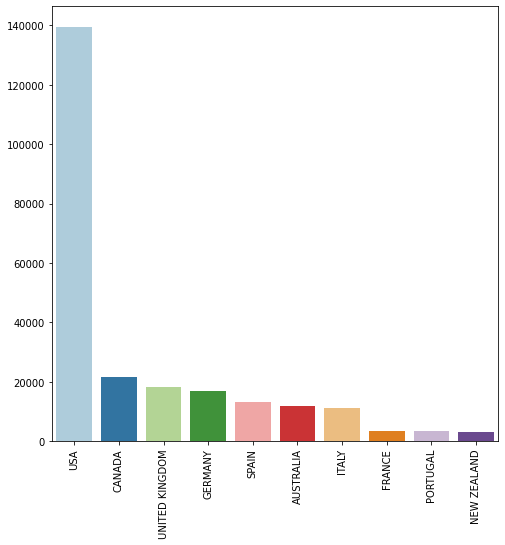

In [ ]:
#Countries with maximumn number of users
top10=users_df['Country'].value_counts().nlargest(10)
sns.barplot(x=top10.index,y=top10.values,palette='Paired')
plt.xticks(rotation=90)